In [1]:
import pandas as pd
import numpy as np
import math
from scipy.spatial.distance import euclidean

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
def perplexity_plot(model, score_name):
    plt.plot(model.score_tracker[score_name].value)
    plt.title('Dependence Perlexity of iteration')
    plt.xlabel('number of iteration')
    plt.ylabel('Perlexity Score')

In [4]:
data = pd.read_csv('preprocessed_data_for_specificity_prediction.csv', index_col='id')

In [5]:
data

,info,specificity,attainable,time_bound,goal,vw_text,vw_ngram,vw_ngram_info,vw_ngram_info_labels
id,,,,,,,,,
0,"&РЕЗУЛЬТАТ_Да,_четко &ПЕРВЫЙ_ШАГ_Не_знаю,_с_че...",0,1,0,Развитие профессиональных навыков,0 |@unigram развитие:1 профессиональный:1 навы...,0 |@ngram развитие:1 профессиональный:1 навык:...,0 |@ngram развитие:1 профессиональный:1 навык:...,0 |@ngram развитие:1 профессиональный:1 навык:...
1,"&РЕЗУЛЬТАТ_Да,_четко &ТИП_ЦЕЛИ_Получить_знания...",1,1,1,Хочу стать выпускником президентской программы,1 |@unigram хотеть:1 стать:1 выпускник:1 прези...,1 |@ngram хотеть:1 стать:1 выпускник:1 президе...,1 |@ngram хотеть:1 стать:1 выпускник:1 президе...,1 |@ngram хотеть:1 стать:1 выпускник:1 президе...
2,"&РЕЗУЛЬТАТ_Да,_четко &ТИП_ЦЕЛИ_Получить_знания...",0,1,0,приобретение новых знаний,2 |@unigram приобретение:1 новый:1 знание:1,2 |@ngram приобретение:1 новый:1 знание:1 прио...,2 |@ngram приобретение:1 новый:1 знание:1 прио...,2 |@ngram приобретение:1 новый:1 знание:1 прио...
4,"&РЕЗУЛЬТАТ_Да,_четко &ТИП_ЦЕЛИ_Получить_знания...",0,0,0,мне хочется узнать о мире как можно больше за ...,4 |@unigram хотеться:1 узнать:1 мир:1 большой:...,4 |@ngram хотеться:1 узнать:1 мир:1 большой:1 ...,4 |@ngram хотеться:1 узнать:1 мир:1 большой:1 ...,4 |@ngram хотеться:1 узнать:1 мир:1 большой:1 ...
5,"&РЕЗУЛЬТАТ_Да,_четко &ТИП_ЦЕЛИ_Получить_знания...",0,1,0,Получение новых знаний,5 |@unigram получение:1 новый:1 знание:1,5 |@ngram получение:1 новый:1 знание:1 получен...,5 |@ngram получение:1 новый:1 знание:1 получен...,5 |@ngram получение:1 новый:1 знание:1 получен...
...,...,...,...,...,...,...,...,...,...
5995,"&РЕЗУЛЬТАТ_Да,_четко &ТИП_ЦЕЛИ_Получить_знания...",0,0,0,Постоянный личностный рост,5995 |@unigram постоянный:1 личностный:1 рост:1,5995 |@ngram постоянный:1 личностный:1 рост:1 ...,5995 |@ngram постоянный:1 личностный:1 рост:1 ...,5995 |@ngram постоянный:1 личностный:1 рост:1 ...
5996,"&РЕЗУЛЬТАТ_Да,_нечетко &ТИП_ЦЕЛИ_Получить_знан...",0,1,0,накопление компетенций,5996 |@unigram накопление:1 компетенция:1,5996 |@ngram накопление:1 компетенция:1,5996 |@ngram накопление:1 компетенция:1 |@inf...,5996 |@ngram накопление:1 компетенция:1 |@inf...
5997,"&РЕЗУЛЬТАТ_Да,_нечетко &ТИП_ЦЕЛИ_Получить_знан...",1,0,0,Разобраться в современных технологиях в образо...,5997 |@unigram разобраться:1 современный:1 тех...,5997 |@ngram разобраться:1 современный:1 техно...,5997 |@ngram разобраться:1 современный:1 техно...,5997 |@ngram разобраться:1 современный:1 техно...


In [6]:
titles = [goal.split()[0] for goal in data['vw_ngram_info_labels']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['vw_ngram_info_labels'], data['specificity'],
                                                    test_size=0.3, random_state=42,
                                                    stratify=data['specificity'])

X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

In [8]:
train_d0_indices = []
train_d1_indices = []
for index in X_train.index:
    if data['specificity'].loc[index] == 0:
        train_d0_indices.append(index)
    else:
        train_d1_indices.append(index)
        
test_d0_indices = []
test_d1_indices = []
for index in X_test.index:
    if data['specificity'].loc[index] == 0:
        test_d0_indices.append(index)
    else:
        test_d1_indices.append(index)

In [9]:
vw_file_train_total = open('vw_documents_train_total.txt', 'w')
vw_file_test_total = open('vw_documents_test_total.txt', 'w')

for index, goal in X_train.iteritems():
    vw_file_train_total.write(goal+'\n')
    
for index, goal in X_test.iteritems():
    vw_file_test_total.write(goal[:goal.find(' |@specificity')]+'\n')

vw_file_train_total.close()
vw_file_test_total.close()

In [10]:
vw_file_train_d0 = open('vw_documents_train_d0.txt', 'w')
vw_file_train_d1 = open('vw_documents_train_d1.txt', 'w')
vw_file_test_d0 = open('vw_documents_test_d0.txt', 'w')
vw_file_test_d1 = open('vw_documents_test_d1.txt', 'w')

for index, goal in data.iterrows():
    if index in train_d0_indices:
        vw_file_train_d0.write(goal['vw_ngram_info_labels']+'\n')
    elif index in train_d1_indices:
        vw_file_train_d1.write(goal['vw_ngram_info_labels']+'\n')
    elif index in test_d0_indices:
        vw_file_test_d0.write(goal['vw_ngram_info']+'\n')
    else:
        vw_file_test_d1.write(goal['vw_ngram_info']+'\n')
        
vw_file_train_d0.close()
vw_file_train_d1.close()
vw_file_test_d0.close()
vw_file_test_d1.close()

# Обучим модель на D0

In [11]:
import artm

import topicnet
from topicnet.cooking_machine.models import TopicModel
from topicnet.viewers import TopTokensViewer
from topicnet.viewers import TopDocumentsViewer
from topicnet.cooking_machine.dataset import Dataset

In [12]:
train_total_batch_vectorizer=artm.BatchVectorizer(data_path='vw_documents_train_total.txt',
                                                  data_format='vowpal_wabbit',
                                                  batch_size = 10000,
                                                  target_folder='./train_total_batches')

train_total_dictionary = train_total_batch_vectorizer.dictionary

In [13]:
train_d0_batch_vectorizer = artm.BatchVectorizer(data_path='vw_documents_train_d0.txt',
                                                 data_format='vowpal_wabbit',
                                                 batch_size = 10000,
                                                 target_folder='./train_d0_batches')

train_d0_dictionary = train_d0_batch_vectorizer.dictionary

In [14]:
train_d1_batch_vectorizer = artm.BatchVectorizer(data_path='vw_documents_train_d1.txt',
                                                 data_format='vowpal_wabbit',
                                                 batch_size = 10000,
                                                 target_folder='./train_d1_batches')

train_d1_dictionary = train_d1_batch_vectorizer.dictionary

Сначала соберем соберем необходимые словари

In [15]:
train_total_dictionary.save_text('train_total_dictionary.txt')
train_d1_dictionary.save_text('train_d1_dictionary.txt')
train_d0_dictionary.save_text('train_d0_dictionary.txt')

file_train_total_dictionary = open('train_total_dictionary.txt', 'r')
train_total_dict_ngram = []
train_total_dict_info = []
for line in file_train_total_dictionary.readlines():
    if '@ngram' in line.split(', '):
        train_total_dict_ngram.append(line.split(', ')[0])
    elif '@info' in line.split(', '):
        train_total_dict_info.append(line.split(', ')[0])
file_train_total_dictionary.close()

file_train_d1_dictionary = open('train_d1_dictionary.txt', 'r')
train_d1_dict_ngram = []
train_d1_dict_info = []
for line in file_train_d1_dictionary.readlines():
    if '@ngram' in line.split(', '):
        train_d1_dict_ngram.append(line.split(', ')[0])
    elif '@info' in line.split(', '):
        train_d1_dict_info.append(line.split(', ')[0])
file_train_d1_dictionary.close()

file_train_d0_dictionary = open('train_d0_dictionary.txt', 'r')
train_d0_dict_ngram = []
train_d0_dict_info = []
for line in file_train_d0_dictionary.readlines():
    if '@ngram' in line.split(', '):
        train_d0_dict_ngram.append(line.split(', ')[0])
    elif '@info' in line.split(', '):
        train_d0_dict_info.append(line.split(', ')[0])
file_train_d0_dictionary.close()

train_total_without_d0_dict_ngram = list(set(train_total_dict_ngram)-set(train_d0_dict_ngram))
train_total_without_d0_dict_info = list(set(train_total_dict_info)-set(train_d0_dict_info))
train_total_without_d0_dict = train_total_without_d0_dict_ngram + train_total_without_d0_dict_info

train_total_without_d1_dict_ngram = list(set(train_total_dict_ngram)-set(train_d1_dict_ngram))
train_total_without_d1_dict_info = list(set(train_total_dict_info)-set(train_d1_dict_info))
train_total_without_d1_dict = train_total_without_d1_dict_ngram + train_total_without_d1_dict_info

In [16]:
train_total_for_Phi11_dictionary = artm.Dictionary()
train_total_for_Phi11_dictionary.load_text('train_total_dictionary.txt')
file_train_total_for_Phi11_dictionary = open('train_total_for_Phi11_dictionary.txt', 'w')

file = open('train_total_dictionary.txt', 'r')
# надо записать первые 2 строчки в file_train_total_for_Phi11_dictionary
lines = file.readlines()
line_1 = lines[0]
line_2 = lines[1]
file_train_total_for_Phi11_dictionary.write(line_1 + line_2)
file.close()


file = open('train_total_dictionary.txt', 'r')
for line in file.readlines()[2:]:
    token = line.split(', ')[0]
    modality = line.split(', ')[1]
    #num_1 = '0.0'
    num_1 = '-1.0'
    num_2 = line.split(', ')[3]
    num_3 = line.split(', ')[4]
    # if (token in train_d0_dict_ngram):
    if (token in train_d0_dict_ngram) or (modality == '@info') or (modality == '@specificity'):
        file_train_total_for_Phi11_dictionary.write(', '.join([token, modality, num_1, num_2, num_3]))
    else:
        num_1 = '1.0'
        file_train_total_for_Phi11_dictionary.write(', '.join([token, modality, num_1, num_2, num_3]))
        #file_train_total_for_Phi11_dictionary.write(line)
file.close()
file_train_total_for_Phi11_dictionary.close()

train_total_for_Phi11_dictionary = artm.Dictionary()
train_total_for_Phi11_dictionary.load_text('train_total_for_Phi11_dictionary.txt')

In [17]:
train_total_for_Phi00_dictionary = artm.Dictionary()
train_total_for_Phi00_dictionary.load_text('train_total_dictionary.txt')
file_train_total_for_Phi00_dictionary = open('train_total_for_Phi00_dictionary.txt', 'w')

file = open('train_total_dictionary.txt', 'r')
lines = file.readlines()
line_1 = lines[0]
line_2 = lines[1]
file_train_total_for_Phi00_dictionary.write(line_1 + line_2)
file.close()


file = open('train_total_dictionary.txt', 'r')
for line in file.readlines()[2:]:
    token = line.split(', ')[0]
    modality = line.split(', ')[1]
    num_1 = '1.0'
    num_2 = line.split(', ')[3]
    num_3 = line.split(', ')[4]
    if (token in train_d0_dict_ngram) or (token in train_d0_dict_info):
        file_train_total_for_Phi00_dictionary.write(', '.join([token, modality, num_1, num_2, num_3]))
    else:
        num_1 = '0.0'
        file_train_total_for_Phi00_dictionary.write(', '.join([token, modality, num_1, num_2, num_3]))
file.close()
file_train_total_for_Phi00_dictionary.close()

train_total_for_Phi00_dictionary = artm.Dictionary()
train_total_for_Phi00_dictionary.load_text('train_total_for_Phi00_dictionary.txt')

In [18]:
file = open('dictionary_train_total_without_d1.txt', 'w')
for token in train_total_without_d1_dict:
    file.write(token + '\n')
file.close()

dictionary_train_total_without_d1 = artm.Dictionary()
dictionary_train_total_without_d1.gather(data_path='./train_total_batches',
                                         vocab_file_path='dictionary_train_total_without_d1.txt')

In [19]:
train_total_vocabulary = train_d0_dict_ngram + train_total_without_d0_dict_ngram + train_d0_dict_info + train_total_without_d0_dict_info + ['0', '1']
vocab_file = open('train_total_vocabulary.txt', 'w')
for token in train_total_vocabulary:
    vocab_file.write(token + '\n')
vocab_file.close()

train_total_dictionary = artm.Dictionary()
train_total_dictionary.gather(data_path='./train_total_batches',
                              vocab_file_path='./train_total_vocabulary')

In [20]:
dataset = Dataset('preprocessed_data_for_TopicNet.csv')

In [21]:
test_total_batch_vectorizer=artm.BatchVectorizer(data_path='vw_documents_test_total.txt',
                                                 data_format='vowpal_wabbit',
                                                 batch_size = 10000,
                                                 target_folder='./test_total_batches')

test_total_dictionary = test_total_batch_vectorizer.dictionary

In [22]:
#np.random.seed(288)
np.random.seed(42)

num_not_sp = 3
num_sp = 6

not_specific_topics = ['topic_{}'.format(i) for i in range(num_not_sp)]
specific_topics = ['topic_{}'.format(i+num_not_sp) for i in range(num_sp)]

# составим матрицу Фи
# для @ngram
# задаю phi_00 рандомно, а не по model_d0 только потому, что потом phi_00 переопределяется через model_00
phi_00 = pd.DataFrame(data=np.random.uniform(0, 0.1, size=(len(train_d0_dict_ngram), len(not_specific_topics))),
                      index=train_d0_dict_ngram,
                      columns=not_specific_topics)
phi_10 = pd.DataFrame(data=np.zeros((len(train_total_without_d0_dict_ngram), phi_00.columns.shape[0])),
                      index=train_total_without_d0_dict_ngram,
                      columns=phi_00.columns)
phi_01 = pd.DataFrame(data=np.random.uniform(0, 0.01, size=(phi_00.index.shape[0], len(specific_topics))),
                      index=phi_00.index,
                      columns=specific_topics)
phi_11 = pd.DataFrame(data=np.random.uniform(0, 1, size=(phi_10.index.shape[0], len(specific_topics))),
                      index=phi_10.index,
                      columns=specific_topics)
phi_1 = phi_01.append(phi_11)
phi_1 = phi_01.append(phi_11)
for column in phi_1.columns:
    phi_1[column] = phi_1[column].apply(lambda item: item/phi_1[column].sum())

#для @info
phi_00_info = pd.DataFrame(data=np.random.uniform(0, 0.1, size=(len(train_d0_dict_info), len(not_specific_topics))),
                      index=train_d0_dict_info,
                      columns=not_specific_topics)
phi_10_info = pd.DataFrame(data=np.zeros((len(train_total_without_d0_dict_info), phi_00.columns.shape[0])),
                           index=train_total_without_d0_dict_info,
                           columns=phi_00.columns)
phi_01_info = pd.DataFrame(data=np.random.uniform(0, 0.01, size=(phi_00_info.index.shape[0], len(specific_topics))),
                           index=phi_00_info.index,
                           columns=specific_topics)
phi_11_info = pd.DataFrame(data=np.random.uniform(0, 1, size=(phi_10_info.index.shape[0], len(specific_topics))),
                           index=phi_10_info.index,
                           columns=specific_topics)
phi_1_info = phi_01_info.append(phi_11_info)
for column in phi_1_info.columns:
    phi_1_info[column] = phi_1_info[column].apply(lambda item: item/phi_1_info[column].sum())

#для @specifisity
c_00 = pd.DataFrame(data=np.ones((1, phi_00.columns.shape[0])),
                      index=['0'],
                      columns=phi_00.columns)
c_10 = pd.DataFrame(data=np.zeros((1, phi_00.columns.shape[0])),
                      index=['1'],
                      columns=phi_00.columns)
c_01 = pd.DataFrame(data=np.zeros((1, phi_01.columns.shape[0])),
                      index=['0'],
                      columns=phi_01.columns)
c_11 = pd.DataFrame(data=np.ones((1, phi_01.columns.shape[0])),
                      index=['1'],
                      columns=phi_01.columns)

phi_specifisity = pd.concat([c_00.append(c_10), c_01.append(c_11)], axis=1)

## ПОДБИРАЕМ ПО СЕТКЕ ПАРАМЕТРЫ МОДЕЛИ

In [23]:
max_roc_auc = 0

num_not_sp = 3
num_sp = 6

phi_specifisity = pd.concat([c_00.append(c_10), c_01.append(c_11)], axis=1)

scores_name = ['tau_Smooth_Phi00_ngram', 'tau_Smooth_Phi00_info',
               'tau_Smooth_Phi00_specificity', 'num_not_sp', 'num_sp',
               'weight_ngram', 'weight_info', 'weight_specificity',
               'roc_auc', 'precision', 'recall', 'accuracy']

metrics = pd.DataFrame(columns=scores_name)
NUM_NOT_SPECIFIC_TOPICS = [3]
NUM_SPECIFIC_TOPICS = [6]
#grid_weight_ngram = [9]
grid_weight_ngram = [9.2]
grid_weight_info = [1.1]
grid_weight_specificity = [96]
grid_Smooth_Phi00_ngram = [5]
grid_Smooth_Phi00_info = [350]
grid_Smooth_Phi00_specificity = [0]

param_index = pd.DataFrame(columns=['tau_Smooth_Phi00_ngram', 'tau_Smooth_Phi00_info',
                                    'tau_Smooth_Phi00_specificity', 'num_not_sp', 'num_sp', 'weight_ngram',
                                    'weight_info', 'weight_specificity'])
index=0
x_0 = []
y_0 = []
y_pred_proba_0 = []
T_0 = []

for tau_Smooth_Phi00_ngram in grid_Smooth_Phi00_ngram:
    for tau_Smooth_Phi00_info in grid_Smooth_Phi00_info:
        for tau_Smooth_Phi00_specificity in grid_Smooth_Phi00_specificity:
            for num_not_sp in NUM_NOT_SPECIFIC_TOPICS:
                for num_sp in NUM_SPECIFIC_TOPICS:
                    for weight_ngram in grid_weight_ngram:
                        for weight_info in grid_weight_info:
                            for weight_specificity in grid_weight_specificity:
                                param_index.loc[index] = [tau_Smooth_Phi00_ngram, tau_Smooth_Phi00_info, tau_Smooth_Phi00_specificity, num_not_sp, num_sp, weight_ngram, weight_info, weight_specificity]

                                print(index)
                                model_d0 = artm.ARTM(num_topics=num_not_sp,
                                                     num_processors=7,
                                                     theta_columns_naming='title',
                                                     class_ids={'@ngram':weight_ngram,
                                                             '@info':weight_info,
                                                             '@specificity':weight_specificity},
                                                     cache_theta=False,
                                                     seed=42,
                                                     dictionary=train_total_dictionary)

                                model_d0.scores.add(artm.PerplexityScore(name='PerlexityScore_ngram', class_ids=['@ngram']))
                                model_d0.scores.add(artm.PerplexityScore(name='PerlexityScore_info', class_ids=['@info']))
                                model_d0.scores.add(artm.PerplexityScore(name='PerlexityScore_specificity', class_ids=['@specificity']))
                                model_d0.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_ngram', class_id='@ngram'))
                                model_d0.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_info', class_id='@info'))
                                model_d0.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
                                model_d0.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=10, class_id='@ngram'))
                                model_d0.scores.add(artm.BackgroundTokensRatioScore(name='BackgroundTokensRatioScore',
                                                                                    class_id='@ngram'))

                                model_d0.fit_offline(batch_vectorizer=train_d0_batch_vectorizer, num_collection_passes=20)

#                                 topic_model = TopicModel(model_d0)
#                                 not_specific_topics = model_d0.topic_names
#                                 specific_topics = ['topic_{}'.format(i+num_not_sp) for i in range(num_sp)]
                                topic_names = not_specific_topics + specific_topics

                                 # составим матрицу Фи
                                 # для @ngram
                                phi_00 = model_d0.get_phi().loc[train_d0_dict_ngram]
                                phi_ngram = pd.concat([phi_00.append(phi_10), phi_1], axis=1)

                                 #для @info
                                phi_00_info = model_d0.get_phi().loc[train_d0_dict_info]
                                phi_info = pd.concat([phi_00_info.append(phi_10_info), phi_1_info], axis=1)

                                 #для @specifisity
                                new_phi = phi_ngram.append(phi_info).append(phi_specifisity)

                                ### Создадим модель

                                model = artm.ARTM(num_topics=len(topic_names),
                                                  num_processors=7,
                                                  theta_columns_naming='title',
                                                  #show_progress_bars=True,
                                                  class_ids={'@ngram':weight_ngram,
                                                             '@info':weight_info,
                                                             '@specificity':weight_specificity},
                                                  cache_theta=True,
                                                  seed=42,
                                                  dictionary=train_total_dictionary)

                                new_best_phi = pd.DataFrame(columns = topic_names)
                                for token in model.get_phi().index:
                                    new_best_phi.loc[token] = new_phi.loc[token]

                                (_, phi_ref) = model.master.attach_model(model=model.model_pwt)
                                np.copyto(phi_ref, new_best_phi.values)

                                model.scores.add(artm.PerplexityScore(name='PerlexityScore_ngram', class_ids=['@ngram']))
                                model.scores.add(artm.PerplexityScore(name='PerlexityScore_info', class_ids=['@info']))
                                model.scores.add(artm.PerplexityScore(name='PerlexityScore_specificity', class_ids=['@specificity']))
                                model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_ngram', class_id='@ngram'))
                                model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_info', class_id='@info'))
                                model.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
                                model.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=10, class_id='@ngram'))
                                model.scores.add(artm.BackgroundTokensRatioScore(name='BackgroundTokensRatioScore',
                                                                                    class_id='@ngram'))

                                # Сглаживание Ф00

                                model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Smooth_Phi00_Regularizer_ngram',
                                                                                       tau = tau_Smooth_Phi00_ngram,
                                                                                       class_ids = ['@ngram'],
                                                                                       topic_names=not_specific_topics,
                                                                                       #dictionary=train_total_for_Phi00_dictionary))
                                                                                       dictionary=train_d0_dictionary))

                                model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Smooth_Phi00_Regularizer_info',
                                                                                       tau = tau_Smooth_Phi00_info,
                                                                                       class_ids = ['@info'],
                                                                                       topic_names=not_specific_topics,
                                                                                       #dictionary=train_total_for_Phi00_dictionary))
                                                                                       dictionary=train_d0_dictionary))

                                model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Smooth_Phi00_Regularizer_specificity',
                                                                                       tau = tau_Smooth_Phi00_specificity,
                                                                                       class_ids = ['@specificity'],
                                                                                       topic_names=not_specific_topics,
                                                                                       dictionary=train_d0_dictionary))

                                model.fit_offline(batch_vectorizer=train_total_batch_vectorizer, num_collection_passes=20)

                                theta_test = model.transform(batch_vectorizer=test_total_batch_vectorizer)
                                p_cd_test = model.transform(batch_vectorizer=test_total_batch_vectorizer,
                                                            predict_class_id='@specificity')

                                y_pred_proba = p_cd_test.loc['1']
                                fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

                                dist_min = math.inf
                                for x, y, treshold in zip(fpr, tpr, thresholds):
                                    if euclidean([0, 1], [x, y]) < dist_min:
                                        T_artm = treshold
                                        dist_min = euclidean([0, 1], [x, y])
                                        x_artm = x
                                        y_artm = y

                                y_pred_labels = []
                                for document in p_cd_test.columns:
                                    if p_cd_test[document].loc['1'] >= T_artm:
                                        y_pred_labels.append(1)
                                    else:
                                        y_pred_labels.append(0)

                                roc_auc = roc_auc_score(y_test, p_cd_test.loc['1'])
                                precision = precision_score(y_test, y_pred_labels)
                                recall = recall_score(y_test, y_pred_labels)
                                accuracy = accuracy_score(y_test, y_pred_labels)

                                x_0.append(x_artm)
                                y_0.append(y_artm)
                                y_pred_proba_0.append(y_pred_proba)
                                T_0.append(T_artm)

                                topic_model = TopicModel(model)
                                param_index.loc[index] = [tau_Smooth_Phi00_ngram, tau_Smooth_Phi00_info, tau_Smooth_Phi00_specificity, num_not_sp, num_sp, weight_ngram, weight_info, weight_specificity]
                                metrics.loc[index] = [tau_Smooth_Phi00_ngram, tau_Smooth_Phi00_info, tau_Smooth_Phi00_specificity, num_not_sp, num_sp, weight_ngram, weight_info, weight_specificity, roc_auc, precision, recall, accuracy]     
                                #print(metrics.loc[index])             
                                model.remove_theta()
                                model.dispose()

                                if roc_auc >= max_roc_auc:
                                    max_roc_auc = roc_auc
                                    print('weight_ngram', weight_ngram)
                                    print('weight_info', weight_info)
                                    print('weight_specificity', weight_specificity)
                                    print('tau_Smooth_Phi00_ngram', tau_Smooth_Phi00_ngram)
                                    print('tau_Smooth_Phi00_info', tau_Smooth_Phi00_info)
                                    print('tau_Smooth_Phi00_specificity', tau_Smooth_Phi00_specificity)
                                    print('max_roc_auc', max_roc_auc)
                                    print('precision', precision)
                                    print('recall', recall)
                                    print('accuracy', accuracy)
                                index += 1

0
weight_ngram 9.2
weight_info 1.1
weight_specificity 96
tau_Smooth_Phi00_ngram 5
tau_Smooth_Phi00_info 350
tau_Smooth_Phi00_specificity 0
max_roc_auc 0.8514177780216965
precision 0.7219251336898396
recall 0.8120300751879699
accuracy 0.7760591795561533


In [24]:
metrics

,tau_Smooth_Phi00_ngram,tau_Smooth_Phi00_info,tau_Smooth_Phi00_specificity,num_not_sp,num_sp,weight_ngram,weight_info,weight_specificity,roc_auc,precision,recall,accuracy
0,5.0,350.0,0.0,3.0,6.0,9.2,1.1,96.0,0.851418,0.721925,0.81203,0.776059


In [25]:
indecies = []
for num in metrics.index:
    if metrics['roc_auc'].loc[num] > 0.86:
        indecies.append(num)

In [26]:
metrics['roc_auc'].loc[indecies].max()

nan

In [27]:
metrics.loc[indecies]

,tau_Smooth_Phi00_ngram,tau_Smooth_Phi00_info,tau_Smooth_Phi00_specificity,num_not_sp,num_sp,weight_ngram,weight_info,weight_specificity,roc_auc,precision,recall,accuracy


In [28]:
metrics['roc_auc'].loc[indecies] == metrics['roc_auc'].loc[indecies].max()

Series([], Name: roc_auc, dtype: bool)

In [29]:
param_index.loc[indecies]

,tau_Smooth_Phi00_ngram,tau_Smooth_Phi00_info,tau_Smooth_Phi00_specificity,num_not_sp,num_sp,weight_ngram,weight_info,weight_specificity


In [30]:
metric_name = 'tau_Smooth_Phi00_info'
file = open('./tables/total_with_model_d0_{}.txt'.format(metric_name), 'w')
file.write(metrics[[metric_name, 'roc_auc', 'precision', 'recall', 'accuracy']].to_latex())
file.close()

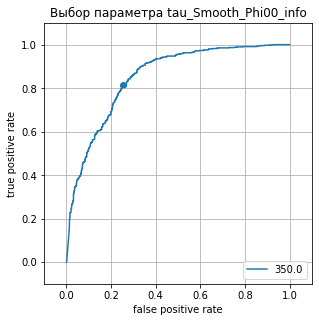

In [31]:
fig, ax = plt.subplots(figsize=[4.8, 4.8])
for x, y, actual, predicted, descr in zip(x_0, y_0,
                                          [y_test for i in range(len(x_0))], 
                                          y_pred_proba_0,
                                          ['{}'.format(metrics[metric_name].loc[i]) for i in range(metrics.shape[0])]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    ax.plot(fpr, tpr, label=descr)
    ax.scatter(x, y)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
ax.set_title('Выбор параметра {}'.format(metric_name))
ax.legend(loc=4)
plt.grid(axis = 'both')
plt.axis([-0.1, 1.1, -0.1, 1.1])
fig.savefig('./images/total_with_model_d0_{} ROC кривая.pdf'.format(metric_name))
fig.savefig('./images/total_with_model_d0_{} ROC кривая.png'.format(metric_name))

# Построим лучшую модель c лучшими параметрами

In [32]:
num_not_sp = 3
num_sp = 6
weight_ngram = 9.2
weight_info = 1.1
weight_specificity = 96
tau_Smooth_Phi00_ngram = 5
tau_Smooth_Phi00_info = 350
tau_Smooth_Phi00_specificity = 0

In [33]:
model_d0 = artm.ARTM(num_topics=num_not_sp,
                    num_processors=7,
                    theta_columns_naming='title',
                    show_progress_bars=True,
                    class_ids={'@ngram':weight_ngram,
                         '@info':weight_info,
                         '@specificity':weight_specificity},
                    cache_theta=False,
                    seed=42,
                    dictionary=train_total_dictionary)

model_d0.scores.add(artm.PerplexityScore(name='PerlexityScore_ngram', class_ids=['@ngram']))
model_d0.scores.add(artm.PerplexityScore(name='PerlexityScore_info', class_ids=['@info']))
model_d0.scores.add(artm.PerplexityScore(name='PerlexityScore_specificity', class_ids=['@specificity']))
model_d0.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_ngram', class_id='@ngram'))
model_d0.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_info', class_id='@info'))
model_d0.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model_d0.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=10, class_id='@ngram'))
model_d0.scores.add(artm.BackgroundTokensRatioScore(name='BackgroundTokensRatioScore',
                                                    class_id='@ngram'))

model_d0.fit_offline(batch_vectorizer=train_d0_batch_vectorizer, num_collection_passes=40)

topic_model = TopicModel(model_d0)
not_specific_topics = model_d0.topic_names
specific_topics = ['topic_{}'.format(i+num_not_sp) for i in range(num_sp)]
topic_names = not_specific_topics + specific_topics

### Создадим модель

best_first_model = artm.ARTM(num_topics=len(topic_names),
                             num_processors=7,
                             theta_columns_naming='title',
                             #show_progress_bars=True,
                             class_ids={'@ngram':weight_ngram,
                                        '@info':weight_info,
                                        '@specificity':weight_specificity},
                             cache_theta=True,
                             seed=42,
                             dictionary=train_total_dictionary)

new_best_phi = pd.DataFrame(columns = topic_names)
for token in best_first_model.get_phi().index:
    new_best_phi.loc[token] = new_phi.loc[token]

(_, phi_ref) = best_first_model.master.attach_model(model=best_first_model.model_pwt)
np.copyto(phi_ref, new_best_phi.values)

best_first_model.scores.add(artm.PerplexityScore(name='PerlexityScore_ngram', class_ids=['@ngram']))
best_first_model.scores.add(artm.PerplexityScore(name='PerlexityScore_info', class_ids=['@info']))
best_first_model.scores.add(artm.PerplexityScore(name='PerlexityScore_specificity', class_ids=['@specificity']))
best_first_model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_ngram', class_id='@ngram'))
best_first_model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_info', class_id='@info'))
best_first_model.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
best_first_model.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=10, class_id='@ngram'))
best_first_model.scores.add(artm.BackgroundTokensRatioScore(name='BackgroundTokensRatioScore',
                                                    class_id='@ngram'))

# Сглаживание Ф00
best_first_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Smooth_Phi00_Regularizer_ngram',
                                                       tau = tau_Smooth_Phi00_ngram,
                                                       class_ids = ['@ngram'],
                                                       topic_names=not_specific_topics,
                                                       dictionary=train_d0_dictionary))

best_first_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Smooth_Phi00_Regularizer_info',
                                                       tau = tau_Smooth_Phi00_info,
                                                       class_ids = ['@info'],
                                                       topic_names=not_specific_topics,
                                                       dictionary=train_d0_dictionary))

best_first_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Smooth_Phi00_Regularizer_specificity',
                                                       tau = tau_Smooth_Phi00_specificity,
                                                       class_ids = ['@specificity'],
                                                       topic_names=not_specific_topics,
                                                       dictionary=train_d0_dictionary))

best_first_model.fit_offline(batch_vectorizer=train_total_batch_vectorizer, num_collection_passes=20)

In [34]:
test_total_batch_vectorizer=artm.BatchVectorizer(data_path='vw_documents_test_total.txt',
                                                 data_format='vowpal_wabbit',
                                                 batch_size = 10000,
                                                 target_folder='./test_total_batches')

test_total_dictionary = test_total_batch_vectorizer.dictionary
theta_test = best_first_model.transform(batch_vectorizer=test_total_batch_vectorizer)
p_cd_test = best_first_model.transform(batch_vectorizer=test_total_batch_vectorizer,
                                       predict_class_id='@specificity')

y_pred_proba = p_cd_test.loc['1']
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

dist_min = math.inf
for x, y, treshold in zip(fpr, tpr, thresholds):
    if euclidean([0, 1], [x, y]) < dist_min:
        T_artm = treshold
        dist_min = euclidean([0, 1], [x, y])
        x_artm = x
        y_artm = y

y_pred_labels = []
for document in p_cd_test.columns:
    if p_cd_test[document].loc['1'] >= T_artm:
        y_pred_labels.append(1)
    else:
        y_pred_labels.append(0)

roc_auc = roc_auc_score(y_test, p_cd_test.loc['1'])
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
accuracy = accuracy_score(y_test, y_pred_labels)

topic_model = TopicModel(best_first_model)

In [35]:
results = pd.DataFrame(index=['roc_auc', 'precision', 'recall', 'accuracy'])
results['до регуляризации'] = [roc_auc, precision, recall, accuracy]

In [36]:
results

,до регуляризации
roc_auc,0.851418
precision,0.721925
recall,0.812030
accuracy,0.776059


In [37]:
file = open('./tables/metrics_total_before_reg_results.txt', 'w')
file.write(results.to_latex())
file.close()

In [38]:
topic_model = TopicModel(best_first_model)
topic_model.describe_scores()

last_value
model_id                   score_name                                 
--23h13m47s_15d06m2020y--- PerlexityScore_ngram                289.603
                           PerlexityScore_info                 43.6212
                           PerlexityScore_specificity          1.01781
                           SparsityPhiScore_ngram             0.653696
                           SparsityPhiScore_info             0.0747296
                           SparsityThetaScore                 0.165001
                           TopTokensScore.average_coherence          0
                           TopTokensScore.num_tokens                90
                           BackgroundTokensRatioScore         0.704783

[-0.1, 1.1, -0.1, 1.1]

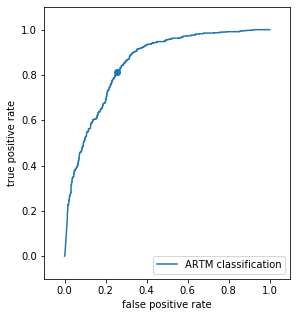

In [39]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
for x, y, actual, predicted, descr in zip([x_artm],
                                    [y_artm],
                                    [y_test], 
                                    [y_pred_proba],
                                    ["ARTM classification"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    plt.plot(fpr, tpr, label=descr)
    plt.scatter(x, y)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])

# ПОДБИРАЕМ ПО СЕТКЕ КОЭФФИЦИЕНТЫ РЕГУЛЯРИЗАЦИИ

Добавим регуляризаторы

In [40]:
model = best_first_model.clone()

In [41]:
file = open('train_without_d0_dictionary.txt', 'w')
for token in train_total_without_d0_dict:
    file.write(token + '\n')
file.close()

In [42]:
train_without_d0_dictionary = artm.Dictionary()
train_without_d0_dictionary.gather(data_path='./train_total_batches',
                                   vocab_file_path='./train_without_d0_dictionary')

In [43]:
# train_total_for_Phi11_dictionary
# с train_without_d0_dictionary было grid_Sparse_Phi1_ngram = [-45], это давало 0.868 или 0.869
# когда были 0 и прошлый значения, grid_Sparse_Phi1_ngram = [-7620], это давало 0.8704

In [44]:
# Декоррелирование Ф1_ngram
model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='Decorrelator_Phi1_ngram',
                                                       class_ids=['@ngram'],
                                                       topic_names=specific_topics))
# Декоррелирование Ф1_info
model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='Decorrelator_Phi1_info',
                                                       class_ids=['@info'],
                                                       topic_names=specific_topics))
# Декоррелирование Ф_specificity
model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='Decorrelator_Phi_specificity',
                                                       class_ids=['@specificity']))

# Разреживание Тета11
# возможно стоит разреживать вообще всю тету
model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='Sparse_Theta11',
                                                         topic_names=specific_topics,
                                                         doc_titles=list(map(lambda item: str(item),
                                                                             train_d1_indices))))
# Разреживание Тета0
model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='Sparse_Theta0',
                                                         topic_names=not_specific_topics,
                                                         doc_titles=list(map(lambda item: str(item),
                                                                             train_d0_indices))))
        
# Разреживание Ф1_ngram
model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Sparse_Phi1_ngram',
                                                       class_ids=['@ngram'],
                                                       topic_names=specific_topics,
                                                       dictionary=train_without_d0_dictionary))
                                                       #dictionary=train_total_for_Phi11_dictionary))
# Разреживание Ф1_info
model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Sparse_Phi1_info',
                                                       class_ids=['@info'],
                                                       topic_names=specific_topics,
                                                       dictionary=train_without_d0_dictionary))
# Разреживание Ф11_specificity
model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='Sparse_Phi1_specificity',
                                                       class_ids=['@specificity'],
                                                       topic_names=specific_topics,
                                                       dictionary=train_without_d0_dictionary))
                                                       #dictionary=train_total_for_Phi11_dictionary))

Введем метрики для отслеживания состояния этих подматриц.

In [45]:
# Ф0
model.scores.add(artm.SparsityPhiScore(name='not_sp_SparsePhiScore_ngram', class_id='@ngram',
                                       topic_names=not_specific_topics))

# Тета11
model.scores.add(artm.SparsityThetaScore(name='sp_SparseThetaScore',
                                         topic_names=specific_topics))

# Ф1
model.scores.add(artm.SparsityPhiScore(name='sp_SparsePhiScore_ngram', class_id='@ngram',
                                       topic_names=specific_topics))

Но именно для этих подматриц нельзя, так как есть только переменные topic_names, но нет dictionary. Так что это не блочные матрицы, а все столбцы.

In [46]:
scores_name = ['tau_Sparse_Phi1_ngram', 'tau_Sparse_Phi1_info',
               'tau_Sparse_Phi1_specificity', 'tau_Sparse_Theta11', 'tau_Sparse_Theta0',
               'tau_Decorrelator_Phi1_ngram', 'tau_Decorrelator_Phi1_info',
               'tau_Decorrelator_Phi_specificity',
               'roc_auc', 'precision', 'recall', 'accuracy']
metrics_reg = pd.DataFrame(columns=scores_name)

max_roc_auc = 0
max_i = 0

grid_Sparse_Phi1_ngram = [-1.8]
grid_Sparse_Phi1_info = [-2.8]
grid_Sparse_Phi1_specificity = [-1]
grid_Sparse_Theta11 = [-8]
grid_Sparse_Theta0 = [2.5]
grid_Decorrelator_Phi1_ngram = [51]
grid_Decorrelator_Phi1_info = [19] #[41001] #[1000000000000]
grid_Decorrelator_Phi_specificity = [1]

index = 0

x_0 = []
y_0 = []
y_pred_proba_0 = []
T_0 = []

for tau_Sparse_Phi1_ngram in grid_Sparse_Phi1_ngram:
    for tau_Sparse_Phi1_info in grid_Sparse_Phi1_info:
        for tau_Sparse_Phi1_specificity in grid_Sparse_Phi1_specificity:
            for tau_Sparse_Theta11 in grid_Sparse_Theta11:
                for tau_Sparse_Theta0 in grid_Sparse_Theta0:
                    for tau_Decorrelator_Phi1_ngram in grid_Decorrelator_Phi1_ngram:
                        for tau_Decorrelator_Phi1_info in grid_Decorrelator_Phi1_info:
                            for tau_Decorrelator_Phi_specificity in grid_Decorrelator_Phi_specificity:
                                print(index)

                                reg_model = model.clone()

                                reg_model.regularizers['Sparse_Phi1_ngram'].tau = tau_Sparse_Phi1_ngram
                                reg_model.regularizers['Sparse_Phi1_info'].tau = tau_Sparse_Phi1_info
                                reg_model.regularizers['Sparse_Phi1_specificity'].tau = tau_Sparse_Phi1_specificity
                                reg_model.regularizers['Sparse_Theta11'].tau = tau_Sparse_Theta11
                                reg_model.regularizers['Sparse_Theta0'].tau = tau_Sparse_Theta0
                                reg_model.regularizers['Decorrelator_Phi1_ngram'].tau = tau_Decorrelator_Phi1_ngram
                                reg_model.regularizers['Decorrelator_Phi1_info'].tau = tau_Decorrelator_Phi1_info
                                reg_model.regularizers['Decorrelator_Phi_specificity'].tau = tau_Decorrelator_Phi_specificity

                                reg_model.fit_offline(batch_vectorizer=train_total_batch_vectorizer, num_collection_passes=20)


                                p_cd_test = reg_model.transform(batch_vectorizer=test_total_batch_vectorizer,
                                                                predict_class_id='@specificity')

                                reg_model.remove_theta()
                                y_pred_proba = p_cd_test.loc['1']
                                fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

                                dist_min = math.inf
                                for x, y, treshold in zip(fpr, tpr, thresholds):
                                    if euclidean([0, 1], [x, y]) < dist_min:
                                        T_artm = treshold
                                        dist_min = euclidean([0, 1], [x, y])
                                        x_artm = x
                                        y_artm = y

                                y_pred_labels = []
                                for document in p_cd_test.columns:
                                    if p_cd_test[document].loc['1'] >= T_artm:
                                        y_pred_labels.append(1)
                                    else:
                                        y_pred_labels.append(0)

                                roc_auc = roc_auc_score(y_test, y_pred_proba)
                                precision = precision_score(y_test, y_pred_labels)
                                recall = recall_score(y_test, y_pred_labels)
                                accuracy = accuracy_score(y_test, y_pred_labels)

                                x_0.append(x_artm)
                                y_0.append(y_artm)
                                y_pred_proba_0.append(y_pred_proba)
                                T_0.append(T_artm)

                                topic_model = TopicModel(reg_model)
                                metrics_reg.loc[index] = [tau_Sparse_Phi1_ngram, tau_Sparse_Phi1_info,
                                                          tau_Sparse_Phi1_specificity, tau_Sparse_Theta11,
                                                          tau_Sparse_Theta0,
                                                          tau_Decorrelator_Phi1_ngram, tau_Decorrelator_Phi1_info,
                                                          tau_Decorrelator_Phi_specificity,
                                                          roc_auc, precision, recall, accuracy]
                                
                                if roc_auc >= max_roc_auc:
                                    max_roc_auc = roc_auc
                                    max_i = tau_Decorrelator_Phi1_info
                                    print('max_roc_auc', max_roc_auc)
                                    print('tau_Sparse_Phi1_ngram', tau_Sparse_Phi1_ngram)
                                    print('tau_Sparse_Phi1_info', tau_Sparse_Phi1_info)
                                    print('tau_Sparse_Phi1_specificity', tau_Sparse_Phi1_specificity)
                                    print('tau_Sparse_Theta11', tau_Sparse_Theta11)
                                    print('tau_Sparse_Theta0', tau_Sparse_Theta0)
                                    print('tau_Decorrelator_Phi1_ngram', tau_Decorrelator_Phi1_ngram)
                                    print('tau_Decorrelator_Phi1_info', max_i)
                                #print(metrics_reg.loc[index])
                                index += 1

0
max_roc_auc 0.8503960631505771
tau_Sparse_Phi1_ngram -1.8
tau_Sparse_Phi1_info -2.8
tau_Sparse_Phi1_specificity -1
tau_Sparse_Theta11 -8
tau_Sparse_Theta0 2.5
tau_Decorrelator_Phi1_ngram 51
tau_Decorrelator_Phi1_info 19


In [47]:
max_roc_auc 0.8720505643671221
tau_Sparse_Phi1_ngram -1.8
best_tau_Sparse_Phi1_info -121
tau_Sparse_Phi1_specificity 0
tau_Sparse_Theta11 -16
tau_Decorrelator_Phi1_ngram 19
tau_Decorrelator_Phi1_info 1000000000000

SyntaxError: invalid syntax (<ipython-input-47-91b1ccf1f2b8>, line 1)

In [ ]:
max_roc_auc 0.8694208148107496
tau_Sparse_Phi1_ngram -3.0
tau_Sparse_Phi1_info -121
tau_Sparse_Phi1_specificity 0
tau_Sparse_Theta11 -19
tau_Sparse_Theta0 -17
tau_Decorrelator_Phi1_ngram 165
tau_Decorrelator_Phi1_info 1000000000000

In [ ]:
max_roc_auc 0.8704672264603113
tau_Sparse_Phi1_ngram 0.7
tau_Sparse_Phi1_info -121
tau_Sparse_Phi1_specificity 0
tau_Sparse_Theta11 -19
tau_Sparse_Theta0 -17
tau_Decorrelator_Phi1_ngram 16
tau_Decorrelator_Phi1_info 1000000000000

In [48]:
metrics_reg['roc_auc'].max()

0.8503960631505771

In [49]:
metrics_reg['roc_auc'] == metrics_reg['roc_auc'].max()

0    True
Name: roc_auc, dtype: bool

In [50]:
metrics_reg.loc[metrics_reg['roc_auc'] > 0.869]

,tau_Sparse_Phi1_ngram,tau_Sparse_Phi1_info,tau_Sparse_Phi1_specificity,tau_Sparse_Theta11,tau_Sparse_Theta0,tau_Decorrelator_Phi1_ngram,tau_Decorrelator_Phi1_info,tau_Decorrelator_Phi_specificity,roc_auc,precision,recall,accuracy


In [51]:
metrics_reg

,tau_Sparse_Phi1_ngram,tau_Sparse_Phi1_info,tau_Sparse_Phi1_specificity,tau_Sparse_Theta11,tau_Sparse_Theta0,tau_Decorrelator_Phi1_ngram,tau_Decorrelator_Phi1_info,tau_Decorrelator_Phi_specificity,roc_auc,precision,recall,accuracy
0,-1.8,-2.8,-1.0,-8.0,2.5,51.0,19.0,1.0,0.850396,0.723262,0.813534,0.777404


In [52]:
metrics_reg['roc_auc']

0    0.850396
Name: roc_auc, dtype: float64

In [53]:
metrics_reg[metrics_reg['roc_auc'] == metrics_reg['roc_auc'].max()]

,tau_Sparse_Phi1_ngram,tau_Sparse_Phi1_info,tau_Sparse_Phi1_specificity,tau_Sparse_Theta11,tau_Sparse_Theta0,tau_Decorrelator_Phi1_ngram,tau_Decorrelator_Phi1_info,tau_Decorrelator_Phi_specificity,roc_auc,precision,recall,accuracy
0,-1.8,-2.8,-1.0,-8.0,2.5,51.0,19.0,1.0,0.850396,0.723262,0.813534,0.777404


In [54]:
topic_model.describe_scores()

last_value
model_id                   score_name                                 
--23h13m51s_15d06m2020y--- PerlexityScore_ngram                291.316
                           PerlexityScore_info                 43.8156
                           PerlexityScore_specificity           1.0192
                           SparsityPhiScore_ngram             0.706846
                           SparsityPhiScore_info              0.143559
                           SparsityThetaScore                 0.380559
                           TopTokensScore.average_coherence          0
                           TopTokensScore.num_tokens                90
                           BackgroundTokensRatioScore          0.58647
                           not_sp_SparsePhiScore_ngram        0.388239
                           sp_SparseThetaScore                0.508122
                           sp_SparsePhiScore_ngram             0.86615

In [55]:
TopTokensViewer(model=topic_model).view_from_jupyter()

/home/polina/anaconda3/lib/python3.7/site-packages/topicnet/viewers/top_tokens_viewer.py:33: UserWarning:

num_top_tokens greater than modality size



topic_0 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 4.740220 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 3.023120 
 
 
 &ТИП_ЦЕЛИ_другое 
 1.935260 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 1.802740 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 1.770870 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков 
 1.696490 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 1.679560 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 1.670210 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 1.665490 
 
 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Работаю_в_организации,_предприятии 
 1.522570 
 
 topic_0 modality token 
 
 @ngram 
 знание 
 6.518330 
 
 
 навык 
 1.966810 
 
 
 получение 
 1.899510 
 
 
 новый 
 1.766430 
 
 
 развитие 
 1.736690 
 
 
 получить 
 1.397340 
 
 
 новое 
 1.211180 
 
 
 компетенция 
 1.045100 
 
 
 получение_новый 
 0.894450 
 
 
 новый_знание 
 0.894410 
 
 topic_0 modality token 
 
 @specificity 
 0 
 45.058270 
 
 
 1 
 -0.000000

topic_1 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 3.772590 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 2.536420 
 
 
 &ТИП_ЦЕЛИ_другое 
 2.155220 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 1.935050 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 1.653340 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 1.631300 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков 
 1.614870 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 1.579010 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 1.561810 
 
 
 &РЕЗУЛЬТАТ_Да,_нечетко 
 1.476910 
 
 topic_1 modality token 
 
 @ngram 
 новое 
 1.384450 
 
 
 стать 
 1.119870 
 
 
 свой 
 0.994090 
 
 
 хороший 
 0.921220 
 
 
 расширение 
 0.837790 
 
 
 узнать 
 0.759480 
 
 
 кругозор 
 0.662350 
 
 
 человек 
 0.540860 
 
 
 узнать_новое 
 0.455410 
 
 
 познание 
 0.455380 
 
 topic_1 modality token 
 
 @specificity 
 0 
 44.164070 
 
 
 1 
 -0.000000

topic_2 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 3.644000 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 2.999450 
 
 
 &ТИП_ЦЕЛИ_другое 
 2.073600 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 1.887250 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 1.682200 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков 
 1.657910 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 1.560560 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 1.545660 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 1.534190 
 
 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Работаю_в_организации,_предприятии 
 1.523940 
 
 topic_2 modality token 
 
 @ngram 
 повышение 
 1.464120 
 
 
 уровень 
 1.234360 
 
 
 приобретение 
 0.937820 
 
 
 умение 
 0.937580 
 
 
 новый 
 0.884560 
 
 
 большой 
 0.875810 
 
 
 работа 
 0.822090 
 
 
 рост 
 0.820000 
 
 
 знание_умение 
 0.598540 
 
 
 профессиональный 
 0.586290 
 
 topic_2 modality token 
 
 @specificity 
 0 
 44.449100 
 
 
 1 
 -0.000000

topic_3 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 9.645710 
 
 
 &ТИП_ЦЕЛИ_другое 
 5.516850 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 5.113150 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 3.751430 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 3.668380 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 3.558610 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 3.093790 
 
 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Работаю_в_организации,_предприятии 
 2.852890 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 2.392430 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков 
 2.390590 
 
 topic_3 modality token 
 
 @ngram 
 профессиональный 
 7.392700 
 
 
 свой 
 2.488760 
 
 
 стать 
 2.294040 
 
 
 повышение 
 1.986370 
 
 
 уровень 
 1.736910 
 
 
 рост 
 1.609880 
 
 
 развитие 
 1.584700 
 
 
 повышение_профессиональный 
 1.424680 
 
 
 профессиональный_уровень 
 1.344550 
 
 
 карьерный 
 1.312780 
 
 topic_3 modality token 
 
 @specificity 
 1 
 81.391510 
 
 
 0 
 -0.000000

topic_4 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 7.873100 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 5.519260 
 
 
 &ТИП_ЦЕЛИ_другое 
 4.367990 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 3.770850 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 3.749780 
 
 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Работаю_в_организации,_предприятии 
 3.533310 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 3.443910 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 2.785640 
 
 
 &РЕЗУЛЬТАТ_Да,_нечетко 
 2.767540 
 
 
 &ОБЛАСТЬ_ЦЕЛИ_Универсальные_компетенции,_гибкие_навыки_(soft_skills) 
 2.697220 
 
 topic_4 modality token 
 
 @ngram 
 компетенция 
 4.012570 
 
 
 управление 
 2.372360 
 
 
 уровень 
 2.297170 
 
 
 повысить 
 2.040230 
 
 
 повышение 
 1.934630 
 
 
 сфера 
 1.787560 
 
 
 навык 
 1.660240 
 
 
 повысить_уровень 
 1.404000 
 
 
 новый 
 1.287840 
 
 
 развитие 
 1.203950 
 
 topic_4 modality token 
 
 @specificity 
 1 
 81.906340 
 
 
 0 
 -0.000000

topic_5 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 10.340890 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 5.219530 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 4.128020 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 3.961000 
 
 
 &ТИП_ЦЕЛИ_другое 
 3.803570 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 3.564840 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 3.493380 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы 
 3.121930 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 3.058270 
 
 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Учусь_в_вузе_(очная_форма_обучения) 
 2.698530 
 
 topic_5 modality token 
 
 @ngram 
 закончить 
 5.161140 
 
 
 программирование 
 3.568040 
 
 
 университет 
 2.696220 
 
 
 учёба 
 2.199030 
 
 
 окончить 
 1.912100 
 
 
 бизнес 
 1.841590 
 
 
 вуз 
 1.697150 
 
 
 язык_программирование 
 1.697150 
 
 
 закончить_университет 
 1.625580 
 
 
 книга 
 1.482520 
 
 topic_5 modality token 
 
 @specificity 
 1 
 84.133360 
 
 
 0 
 -0.000000

topic_6 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 9.450050 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 5.624670 
 
 
 &ТИП_ЦЕЛИ_другое 
 4.741970 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 4.255960 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 4.106930 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 3.286280 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы 
 3.094750 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 2.968280 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 2.944650 
 
 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Работаю_в_организации,_предприятии 
 2.795290 
 
 topic_6 modality token 
 
 @ngram 
 диссертация 
 2.576090 
 
 
 защитить 
 1.731990 
 
 
 докторский 
 1.521680 
 
 
 технология 
 1.466820 
 
 
 степень 
 1.451660 
 
 
 докторский_диссертация 
 1.381670 
 
 
 научиться 
 1.202580 
 
 
 образование 
 1.166830 
 
 
 область 
 1.106710 
 
 
 получить 
 1.093160 
 
 topic_6 modality token 
 
 @specificity 
 1 
 82.700880 
 
 
 0 
 -0.000000

topic_7 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 10.380340 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 6.489830 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 4.395980 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 4.289070 
 
 
 &ТИП_ЦЕЛИ_другое 
 4.169640 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Иностранные_языки 
 4.086110 
 
 
 &ОБЛАСТЬ_ЦЕЛИ_Иностранные_языки,_гуманитарные_знания_и_навыки 
 3.924490 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 3.904810 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 3.161240 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 3.045110 
 
 topic_7 modality token 
 
 @ngram 
 язык 
 10.051710 
 
 
 английский 
 6.810800 
 
 
 английский_язык 
 4.498050 
 
 
 выучить 
 4.376660 
 
 
 уровень 
 2.474200 
 
 
 изучить 
 2.348870 
 
 
 иностранный 
 1.839240 
 
 
 иностранный_язык 
 1.779190 
 
 
 выучить_английский 
 1.659180 
 
 
 изучение 
 0.977160 
 
 topic_7 modality token 
 
 @specificity 
 1 
 85.267500 
 
 
 0 
 -0.000000

topic_8 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 10.071400 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 6.535760 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 3.969300 
 
 
 &ТИП_ЦЕЛИ_другое 
 3.751450 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 3.115860 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 2.943260 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 2.718850 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 2.694050 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы 
 2.314050 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков 
 2.155290 
 
 topic_8 modality token 
 
 @ngram 
 получить 
 5.230130 
 
 
 образование 
 3.375790 
 
 
 высокий 
 2.536240 
 
 
 обучение 
 2.165620 
 
 
 диплом 
 1.895140 
 
 
 квалификация 
 1.758070 
 
 
 высокий_образование 
 1.575570 
 
 
 курс 
 1.479740 
 
 
 получить_высокий 
 1.347800 
 
 
 пройти 
 1.347790 
 
 topic_8 modality token 
 
 @specificity 
 1 
 81.120920 
 
 
 0 
 -0.000000

In [ ]:
perplexity_plot(reg_model, score_name='PerlexityScore_ngram')

In [ ]:
metric_name = 'tau_Decorrelator_Phi1_info'
file = open('./tables/with_model_d0_{}.txt'.format(metric_name), 'w')
file.write(metrics_reg[[metric_name, 'roc_auc', 'precision', 'recall', 'accuracy']].to_latex())
file.close()

In [ ]:
fig, ax = plt.subplots(figsize=[4.8, 4.8])
for x, y, actual, predicted, descr in zip(x_0, y_0,
                                          [y_test for i in range(len(x_0))], 
                                          y_pred_proba_0,
                                          ['{}'.format(metrics_reg[metric_name].loc[i]) for i in range(metrics_reg.shape[0])]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    ax.plot(fpr, tpr, label=descr)
    ax.scatter(x, y)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
ax.set_title('Выбор параметра {}'.format(metric_name))
ax.legend(loc=4)
plt.grid(axis = 'both')
plt.axis([-0.1, 1.1, -0.1, 1.1])
fig.savefig('./images/with_model_d0_{} ROC кривая.pdf'.format(metric_name))
fig.savefig('./images/with_model_d0_{} ROC кривая.png'.format(metric_name))

# Построим лучшую модель с лучшими параметрами

In [57]:
# tau_SparsePhi_ngram = -0.83
# tau_SparsePhi_info = 180.62
# tau_SparsePhi_specificity = -6
# tau_SparseTheta = -5
# tau_DecorrelatorPhi_ngram = 2342
# tau_DecorrelatorPhi_info = 10000
# tau_DecorrelatorPhi_specificity = 0

tau_SparsePhi_ngram = -1.8
tau_SparsePhi_info = -121
tau_SparsePhi_specificity = 0
tau_SparseTheta = 0
tau_DecorrelatorPhi_ngram = 19
tau_DecorrelatorPhi_info = 10**12
tau_DecorrelatorPhi_specificity = 0

In [58]:
reg_best_model = best_first_model.clone()

In [59]:
reg_best_model.scores.add(artm.TopicMassPhiScore(name='TopicMassPhiScore', model_name=reg_model.model_nwt))

In [60]:
# Декоррелирование Ф11_ngram
reg_best_model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='sp_DecorrelatorPhiRegularizer_ngram',
                                                       class_ids=['@ngram'],
                                                       topic_names=specific_topics))
# Декоррелирование Ф11_info
reg_best_model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='sp_DecorrelatorPhiRegularizer_info',
                                                       class_ids=['@info'],
                                                       topic_names=specific_topics))
# Декоррелирование Ф_specificity
reg_best_model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='sp_DecorrelatorPhiRegularizer_specificity',
                                                       class_ids=['@specificity']))

# Разреживание Тета11
reg_best_model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='sp_SparseThetaRegularizer',
                                                         topic_names=specific_topics,
                                                         doc_titles=list(map(lambda item: str(item),
                                                                             train_d1_indices))))
# Разреживание Ф11_ngram
reg_best_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='sp_SparsePhiRegularizer_ngram',
                                                       class_ids=['@ngram'],
                                                       topic_names=specific_topics,
                                                      dictionary=train_total_for_Phi11_dictionary))
# Разреживание Ф11_info
reg_best_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='sp_SparsePhiRegularizer_info',
                                                       class_ids=['@info'],
                                                       topic_names=specific_topics,
                                                      dictionary=train_without_d0_dictionary))
# Разреживание Ф11_specificity
reg_best_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='sp_SparsePhiRegularizer_specificity',
                                                       class_ids=['@specificity'],
                                                       topic_names=specific_topics,
                                                      dictionary=train_total_for_Phi11_dictionary))

In [61]:
reg_best_model.regularizers['sp_SparsePhiRegularizer_ngram'].tau = tau_SparsePhi_ngram
reg_best_model.regularizers['sp_SparsePhiRegularizer_info'].tau = tau_SparsePhi_info
reg_best_model.regularizers['sp_SparsePhiRegularizer_specificity'].tau = tau_SparsePhi_specificity
reg_best_model.regularizers['sp_SparseThetaRegularizer'].tau = tau_SparseTheta
reg_best_model.regularizers['sp_DecorrelatorPhiRegularizer_ngram'].tau = tau_DecorrelatorPhi_ngram
reg_best_model.regularizers['sp_DecorrelatorPhiRegularizer_info'].tau = tau_DecorrelatorPhi_info
reg_best_model.regularizers['sp_DecorrelatorPhiRegularizer_specificity'].tau = tau_DecorrelatorPhi_specificity

reg_best_model.fit_offline(batch_vectorizer=train_total_batch_vectorizer, num_collection_passes=20)


p_cd_test = reg_best_model.transform(batch_vectorizer=test_total_batch_vectorizer,
                                predict_class_id='@specificity')

y_pred_proba = p_cd_test.loc['1']
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

dist_min = math.inf
for x, y, treshold in zip(fpr, tpr, thresholds):
    if euclidean([0, 1], [x, y]) < dist_min:
        T_artm = treshold
        dist_min = euclidean([0, 1], [x, y])
        x_artm = x
        y_artm = y

y_pred_labels = []
for document in p_cd_test.columns:
    if p_cd_test[document].loc['1'] >= T_artm:
        y_pred_labels.append(1)
    else:
        y_pred_labels.append(0)

roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
accuracy = accuracy_score(y_test, y_pred_labels)

In [62]:
print('roc_auc', roc_auc)
print('precision', precision)
print('recall', recall)
print('accuracy', accuracy)

roc_auc 0.865318405502808
precision 0.7587168758716876
recall 0.8180451127819549
accuracy 0.8022864828513786


In [63]:
topic_model = TopicModel(reg_best_model)
topic_model.describe_scores()

last_value
model_id                   score_name                                 
--02h03m13s_16d06m2020y--- PerlexityScore_ngram                321.329
                           PerlexityScore_info                 110.115
                           PerlexityScore_specificity          1.04312
                           SparsityPhiScore_ngram             0.343443
                           SparsityPhiScore_info               0.66175
                           SparsityThetaScore                 0.149462
                           TopTokensScore.average_coherence          0
                           TopTokensScore.num_tokens                90
                           BackgroundTokensRatioScore         0.589867
                           TopicMassPhiScore                         1

In [64]:
# reg_best_model.save('reg_best_model_p_wt', model_name='p_wt')
# reg_best_model.save('reg_best_model_n_wt', model_name='n_wt')

# Вычисляем специфичность документов и слов

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

def frequency_matrix(data, phi):
    vocabulary = train_total_dict_ngram
    
    corpus = data['ngram_as_str']
    vectorizer = CountVectorizer(vocabulary=vocabulary)
    X = vectorizer.fit_transform(corpus)

    matrix = pd.DataFrame(X.toarray())
    matrix.index=list(map(lambda item: str(item), data['id']))
    matrix.columns=vectorizer.get_feature_names()
    
    return matrix

In [66]:
def specifisity_of_document(doc_title, specific_topics, theta):
    specifisity_of_doc = 0
    for topic in specific_topics:
        specifisity_of_doc+=theta.loc[topic][doc_title]
    return specifisity_of_doc

In [107]:
def specifisity_of_token(token, specific_topics, matrix_of_frequancies, theta, phi):
    specifisity_of_t = 0
    for topic in specific_topics:
        n_topic = n_t(topic, theta)
        n_word = n_w(token, matrix_of_frequancies, theta)
        specifisity_of_t += phi.loc[token][topic] * n_topic / n_word
        if n_word == 0:
            print(token)
    return specifisity_of_t

def n_w(token, matrix_of_frequancies, theta):
    return matrix_of_frequancies.loc[theta.columns][token].sum()

# def n_t(topic, theta):
#     columns = theta.columns
#     n_d_list = matrix_of_frequancies.loc[columns].sum(axis=1)
#     theta_h = theta.loc[topic][columns]
#     n = sum(list(map(lambda t: t[0]*t[1], zip(theta_h,n_d_list))))
#     return n

def n_t(topic, theta):
    n = sum([topic_mass for topic, topic_mass in reg_best_model.score_tracker['TopicMassPhiScore'].last_topic_mass.items()])
    # n = reg_best_model.get_phi().shape[0]
    return reg_best_model.score_tracker['TopicMassPhiScore'].last_topic_mass[topic] / n

In [90]:
n = sum([topic_mass for topic, topic_mass in reg_best_model.score_tracker['TopicMassPhiScore'].last_topic_mass.items()])

In [94]:
reg_best_model.get_phi().shape[0]

3533

In [68]:
import time
import random

def get_arrangement_permutation(dist, mode):
    """Returns best permutation of topics for topics spectrum.
    Args:
        dist: Matrix [N_topics, N_topics] of distances between topics.
        mode: What algorith to use.
            String, one of:
                "none" - returns identity permutation;
                "tsne" - builds tSNE embedding from topic space to R^1 (line),
                    returns order of topics' projections.
    Returns:
        Permutation - a list of length N_topics, with unique integers between 0
        and N_topics-1. This permutations should be applied to topics as
        columns of phi to obtain a spectrum.
    """
    start_time = time.time()

    if mode == "none":
        return [i for i in range(dist.shape[0])]
    elif mode == "tsne":
        from sklearn.manifold import TSNE
        tsne_model = TSNE(n_components=1, random_state=0, metric="precomputed")
        tsne_result = tsne_model.fit_transform(dist).reshape(-1)
        perm = np.argsort(tsne_result)

    return list(perm)

In [69]:
best_colors = [
    (0.02, 0.00, 0.42),
    (0.90, 0.0, 0.0),
    (0.65, 0.33, 0.55),
    (0.40, 0.58, 0.78),
    (0.78, 0.47, 0.40),
    (0.4, 0.78, 0.57),
    (0.0, 0.5, 0.73),
    (0.0, 0.74, 0.99),
    (0.93, 0.99, 0.0),
]

## Специфичность документов

In [70]:
TopTokensViewer(model=topic_model).view_from_jupyter()

/home/polina/anaconda3/lib/python3.7/site-packages/topicnet/viewers/top_tokens_viewer.py:33: UserWarning:

num_top_tokens greater than modality size



topic_0 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 8.244390 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 3.074410 
 
 
 &ТИП_ЦЕЛИ_другое 
 1.671430 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 1.665190 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 1.649040 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 1.628420 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 1.481940 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 1.444710 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков 
 1.412540 
 
 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Работаю_в_организации,_предприятии 
 1.294050 
 
 topic_0 modality token 
 
 @ngram 
 знание 
 6.315100 
 
 
 навык 
 2.132610 
 
 
 получение 
 2.020500 
 
 
 развитие 
 1.780470 
 
 
 новый 
 1.545630 
 
 
 получить 
 1.339750 
 
 
 новое 
 1.193970 
 
 
 компетенция 
 0.887150 
 
 
 новый_знание 
 0.869340 
 
 
 получение_новый 
 0.869290 
 
 topic_0 modality token 
 
 @specificity 
 0 
 45.079170 
 
 
 1 
 -0.000000

topic_1 modality token 
 
 @info 
 &РЕЗУЛЬТАТ_Да,_четко 
 2.875000 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 2.524910 
 
 
 &ПРЕГРАДЫ_Не_вижу_преград 
 2.333430 
 
 
 &ТИП_ЦЕЛИ_другое 
 2.099170 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 1.914080 
 
 
 &РЕЗУЛЬТАТ_Да,_нечетко 
 1.905040 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 1.712530 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 1.696390 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 1.693670 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков 
 1.383890 
 
 topic_1 modality token 
 
 @ngram 
 новое 
 1.423100 
 
 
 стать 
 1.135260 
 
 
 свой 
 0.980880 
 
 
 хороший 
 0.874120 
 
 
 расширение 
 0.833280 
 
 
 узнать 
 0.723030 
 
 
 кругозор 
 0.652450 
 
 
 человек 
 0.592090 
 
 
 узнать_новое 
 0.447780 
 
 
 познание 
 0.447710 
 
 topic_1 modality token 
 
 @specificity 
 0 
 44.184790 
 
 
 1 
 -0.000000

topic_2 modality token 
 
 @info 
 &ПРЕГРАДЫ_Не_вижу_преград 
 3.084840 
 
 
 &ТИП_ЦЕЛИ_другое 
 2.716270 
 
 
 &РЕЗУЛЬТАТ_Да,_четко 
 2.545000 
 
 
 &ПЕРВЫЙ_ШАГ_знаю_с_чего_начать 
 1.811800 
 
 
 &ТИП_ЦЕЛИ_Приобрести_новые_навыки 
 1.776200 
 
 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Работаю_в_организации,_предприятии 
 1.771800 
 
 
 &ТИП_ЦЕЛИ_Развить_имеющиеся_знания_и_навыки 
 1.739900 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 1.657370 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 1.526360 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков 
 1.516080 
 
 topic_2 modality token 
 
 @ngram 
 повышение 
 1.596190 
 
 
 уровень 
 1.329790 
 
 
 новый 
 1.105440 
 
 
 приобретение 
 0.919870 
 
 
 умение 
 0.918330 
 
 
 рост 
 0.863260 
 
 
 большой 
 0.799440 
 
 
 работа 
 0.616340 
 
 
 знание_умение 
 0.586650 
 
 
 повышение_уровень 
 0.558030 
 
 topic_2 modality token 
 
 @specificity 
 0 
 44.479440 
 
 
 1 
 -0.000000

topic_3 modality token 
 
 @info 
 &ОСНОВНОЙ_ВИД_ДЕЙТЕЛЬНОСТИ_Не_работаю,_пенсионер 
 39.412500 
 
 
 &ОБРАЗОВАНИЕ_Среднее_общее_образование 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Астрономия 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Новое_место_работы 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Планирование,_самоорганизация_и_тайм-менеджмент 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Психология 
 -0.000000 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 -0.000000 
 
 
 &СФЕРА_ЗАНЯТОСТИ_Нефтегазовая_промышленность 
 -0.000000 
 
 
 &ТИП_ЦЕЛИ_Включиться_в_новый_проект/деятельность 
 -0.000000 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 -0.000000 
 
 topic_3 modality token 
 
 @ngram 
 профессиональный 
 2.826060 
 
 
 повышение 
 1.685700 
 
 
 стать 
 1.479530 
 
 
 свой 
 1.384370 
 
 
 уровень 
 0.858370 
 
 
 специалист 
 0.738840 
 
 
 рост 
 0.561930 
 
 
 повышение_профессиональный 
 0.545710 
 
 
 профессиональный_уровень 
 0.512770 
 
 
 развитие 
 0.498090 
 
 topic_3 modality token 
 
 @specificity 
 1 
 39.412500 
 
 
 0 
 -0.000000

topic_4 modality token 
 
 @info 
 &СФЕРА_ЗАНЯТОСТИ_Военно-промышленный_комплекс 
 39.146920 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы 
 -0.000000 
 
 
 &ОБРАЗОВАНИЕ_Среднее_общее_образование 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Навыки_ручного_труда 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Новое_место_работы 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Спорт,_танцы,_боевые_искусства 
 -0.000000 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 -0.000000 
 
 
 &СФЕРА_ЗАНЯТОСТИ_Дизайн_и_графика 
 -0.000000 
 
 
 &ТИП_ЦЕЛИ_Включиться_в_новый_проект/деятельность 
 -0.000000 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 -0.000000 
 
 topic_4 modality token 
 
 @ngram 
 компетенция 
 1.478210 
 
 
 сфера 
 1.081610 
 
 
 управление 
 0.897410 
 
 
 навык 
 0.757480 
 
 
 повысить 
 0.705690 
 
 
 повысить_уровень 
 0.527480 
 
 
 деятельность 
 0.525260 
 
 
 новый 
 0.464890 
 
 
 развитие 
 0.453660 
 
 
 уровень 
 0.432590 
 
 topic_4 modality token 
 
 @specificity 
 1 
 39.146920 
 
 
 0 
 -0.000000

topic_5 modality token 
 
 @info 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Работа_по_дому,_хозяйству 
 21.546860 
 
 
 ИНФОРМАЦИИ 
 8.103530 
 
 
 НЕТ 
 8.103530 
 
 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Новое_место_работы 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Планирование,_самоорганизация_и_тайм-менеджмент 
 -0.000000 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 -0.000000 
 
 
 &СФЕРА_ЗАНЯТОСТИ_Нефтегазовая_промышленность 
 -0.000000 
 
 
 &ТИП_ЦЕЛИ_Включиться_в_новый_проект/деятельность 
 -0.000000 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 -0.000000 
 
 topic_5 modality token 
 
 @ngram 
 закончить 
 1.708290 
 
 
 программирование 
 1.165730 
 
 
 университет 
 0.930260 
 
 
 бизнес 
 0.829370 
 
 
 учёба 
 0.721240 
 
 
 окончить 
 0.617670 
 
 
 вуз 
 0.554030 
 
 
 язык_программирование 
 0.543960 
 
 
 закончить_университет 
 0.523040 
 
 
 книга 
 0.481460 
 
 topic_5 modality token 
 
 @specificity 
 1 
 38.740580 
 
 
 0 
 -0.000000

topic_6 modality token 
 
 @info 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы 
 -0.000000 
 
 
 &ОБРАЗОВАНИЕ_Среднее_общее_образование 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Астрономия 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Новое_место_работы 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Планирование,_самоорганизация_и_тайм-менеджмент 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Психология 
 -0.000000 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 -0.000000 
 
 
 &СФЕРА_ЗАНЯТОСТИ_Нефтегазовая_промышленность 
 -0.000000 
 
 
 &ТИП_ЦЕЛИ_Включиться_в_новый_проект/деятельность 
 -0.000000 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 -0.000000 
 
 topic_6 modality token 
 
 @ngram 
 работа 
 1.020830 
 
 
 область 
 1.000860 
 
 
 диссертация 
 0.846450 
 
 
 защитить 
 0.563980 
 
 
 докторский 
 0.493900 
 
 
 научиться 
 0.484030 
 
 
 степень 
 0.470600 
 
 
 докторский_диссертация 
 0.447340 
 
 
 технология 
 0.400630 
 
 
 наука 
 0.348060 
 
 topic_6 modality token 
 
 @specificity 
 1 
 38.409860 
 
 
 0 
 -0.000000

topic_7 modality token 
 
 @info 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы 
 -0.000000 
 
 
 &ОБРАЗОВАНИЕ_Среднее_общее_образование 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Астрономия 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Новое_место_работы 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Планирование,_самоорганизация_и_тайм-менеджмент 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Психология 
 -0.000000 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 -0.000000 
 
 
 &СФЕРА_ЗАНЯТОСТИ_Нефтегазовая_промышленность 
 -0.000000 
 
 
 &ТИП_ЦЕЛИ_Включиться_в_новый_проект/деятельность 
 -0.000000 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 -0.000000 
 
 topic_7 modality token 
 
 @ngram 
 язык 
 3.583960 
 
 
 английский 
 2.409570 
 
 
 английский_язык 
 1.579880 
 
 
 выучить 
 1.542330 
 
 
 изучить 
 0.981460 
 
 
 уровень 
 0.926430 
 
 
 иностранный 
 0.641840 
 
 
 иностранный_язык 
 0.621080 
 
 
 выучить_английский 
 0.571120 
 
 
 изучение 
 0.436580 
 
 topic_7 modality token 
 
 @specificity 
 1 
 39.207020 
 
 
 0 
 -0.000000

topic_8 modality token 
 
 @info 
 &ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы 
 -0.000000 
 
 
 &ОБРАЗОВАНИЕ_Среднее_общее_образование 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Астрономия 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Новое_место_работы 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Планирование,_самоорганизация_и_тайм-менеджмент 
 -0.000000 
 
 
 &ПОДОБЛАСТЬ_ЦЕЛИ_Психология 
 -0.000000 
 
 
 &ПРЕГРАДЫ_есть_преграды 
 -0.000000 
 
 
 &СФЕРА_ЗАНЯТОСТИ_Нефтегазовая_промышленность 
 -0.000000 
 
 
 &ТИП_ЦЕЛИ_Включиться_в_новый_проект/деятельность 
 -0.000000 
 
 
 &ТИП_ЦЕЛИ_Получить_знания_в_новой_области 
 -0.000000 
 
 topic_8 modality token 
 
 @ngram 
 получить 
 2.345340 
 
 
 образование 
 1.714290 
 
 
 высокий 
 0.973530 
 
 
 обучение 
 0.851760 
 
 
 диплом 
 0.724480 
 
 
 квалификация 
 0.667780 
 
 
 высокий_образование 
 0.603860 
 
 
 курс 
 0.560160 
 
 
 получить_высокий 
 0.515490 
 
 
 пройти 
 0.514030 
 
 topic_8 modality token 
 
 @specificity 
 1 
 38.090260 
 
 
 0 
 -0.000000

In [71]:
dataset = Dataset('preprocessed_data_for_TopicNet.csv')

In [72]:
TopDocumentsViewer(model=topic_model, dataset=dataset, max_top_number=10).view_from_jupyter()

Topic name: topic_0 2885 Получить дополнительные знания и навыки, которые пригодятся в дальнейшем . 3100 Получение необходимых знаний для решения задач, стоящих перед мной.. 2630 Получение навыков и знаний для достижения материального благополучия. 2292 применить полученные знания в высокотехнологичной области и внести посильный вклад в развитие этой области. 3809 получить новые знания, которые пригодятся мне в дальнейшем. 1540 получение новых знаний, необходимых при выполнении должностных обюязанностей. 4018 Получить новые знания и навыки в области преподаваемых дисциплин. 257 Целенаправленное развитие подразумевает человеческое саморазвитие в определенной сфере деятельности, находя средства для реализации поставленных задач и достижений основных целей.. 875 Получение новых компетенций, которые можно будет применять в решении новых задач. 847 Получить новые знания. Запомнить новые ФИО, даты, понятия, определения. Topic name: topic_1 1313 Совершенствоваться в том, что мне нравится и у меня это хорошо получается. Ведь если это мне нравится и само хорошо получается, то если в этом еще и развиваться, то это просто бомба!. 2073 Первая - абстрактная достаточно. Научиться понимать то, что мне на самом деле нужно делать, чтобы забустить себя, чтобы не тратить кучу времени впустую. 3036 1.	Принимать все изменения в жизни и работе, связанные с человеческим прогрессом, социально-экономическим положением и популярными тенденциями общества.. 1669 Хочу лучше понимать людей, уметь контактировать с разными социальными группами, а не только с айтишниками. 3859 Понять, что я делаю лучше всего и совершенствоваться в этом, при условии, что это приносит пользу другим людям. 718 Cтать более эрудированной личностью, всесторонне развитой, интересным собеседником. 2088 Научиться отслеживать эмоции, управлять гневом, учиться контролировать эмоции . 2514 Развивать мышление, стать умнее и быть более гибкой сознанием.. 232 Понимание процессов изменений во внешней среде.. 838 Стать отличным специалистом в выбранной области. Topic name: topic_2 4545 Чем больше знаю я, тем больше знают мои ученики. 5306 Повышение личной эффективности и карьерный рост. 5789 Дойти до уровня при котором я смогу устроиться на работу, которую хочу. 9 Достичь того уровня образования, которое будет меня устраивать. 1200 повышение уровня своей эрудиции, правовой и общей культуры;. 3936 Читать как можно больше литературы различных жанров. 3981 Повышение уровни сложности проектов, в которых я могу участвовать. 3656 научиться оптимально ставить цели, исходя из ресурсов. 903 Повышение уровня интеллекта . 4096 Обучиться профессиям, которые будут востребованны в ближайшие 20 лет. Topic name: topic_3 3385 Стать руководителем одно из направлений развития в Агенстве стратегических инициатив/ Платформы НТИ. 3384 Стать руководителем одного из направлений Агенства Стратегических Инициатив / Платформы НТИ. 154 Постоянное улучшение своих навыков и профессиональных качеств. 2341 стать эффективным специалистом для цифровой трансформации. 4122 Повышение конкурентоспособности на рынке труда.. 5738 Развитие творческого потенциала и расширение компетентностного охвата решаемых задач. 162 Стать признанным экспертом в своем деле. 54 стать востребованным руководителем на рынке труда. 4235 быть эффективным специалистом на рынке труда. 2318 стать профессионалом своего дела . Topic name: topic_4 5221 Повысить личную эффективность работы в условиях многозадачности. Навыки: концентрации внимания, переключения, agile тайм-менеджмент, делегирование. 2477 совершенствовать навык публичных выступлений и преодолеть страх перед аудиторией. 3331 Освоение новых методов и приемов работы. 637 Если, это инфокурс, то завершить все конспекты и дз до истечения его срока. То есть соблюдать дэдлайн.. 3068 Придумать способ сохранения нормы доходности в условиях демпенга импортеров крепежных изделий из КНР.. 1859 Развить компетенции проектного менеджмента. 5842 Улучшить компетенции в проектном управлении. 4154 Повысить компетен

In [73]:
phi = reg_best_model.get_phi()
theta = reg_best_model.get_theta()

In [74]:
topic_description = pd.DataFrame(index = theta.index, columns = ['description'])
topic_description.loc['topic_0']['description'] = 'topic_0: (не конкретно)'
topic_description.loc['topic_1']['description'] = 'topic_1: (не конкретно)'
topic_description.loc['topic_2']['description'] = 'topic_2: (не конкретно)'
topic_description.loc['topic_3']['description'] = 'topic_3: Получить высшее образование'
topic_description.loc['topic_4']['description'] = 'topic_4: Стать грамотным специалистом в своей сфере'
topic_description.loc['topic_5']['description'] = 'topic_5: Развить профессиональные управленческие качества'
topic_description.loc['topic_6']['description'] = 'topic_6: Изучить иностранный язык'
topic_description.loc['topic_7']['description'] = 'topic_7: Защитить докторскую диссертацию'
topic_description.loc['topic_8']['description'] = 'topic_8: Получить ученую степень'

In [75]:
doc_titles = list(map(lambda item: str(item), train_d0_indices + train_d1_indices))
specifisity = pd.DataFrame(index=doc_titles, columns=['topic', 'specifisity'])
for doc_title in doc_titles:
    s_d = specifisity_of_document(doc_title, specific_topics, theta)
    specifisity.loc[doc_title]['specifisity'] = s_d
    specifisity.loc[doc_title]['topic'] = theta[theta[doc_title] == theta[doc_title].max()].index.tolist()[0]

In [76]:
topics_vec = [phi[topic].values for topic in phi.columns]
dist_matrix = cosine_similarity(topics_vec, topics_vec)
topic_spectrum = get_arrangement_permutation(dist_matrix, 'tsne')

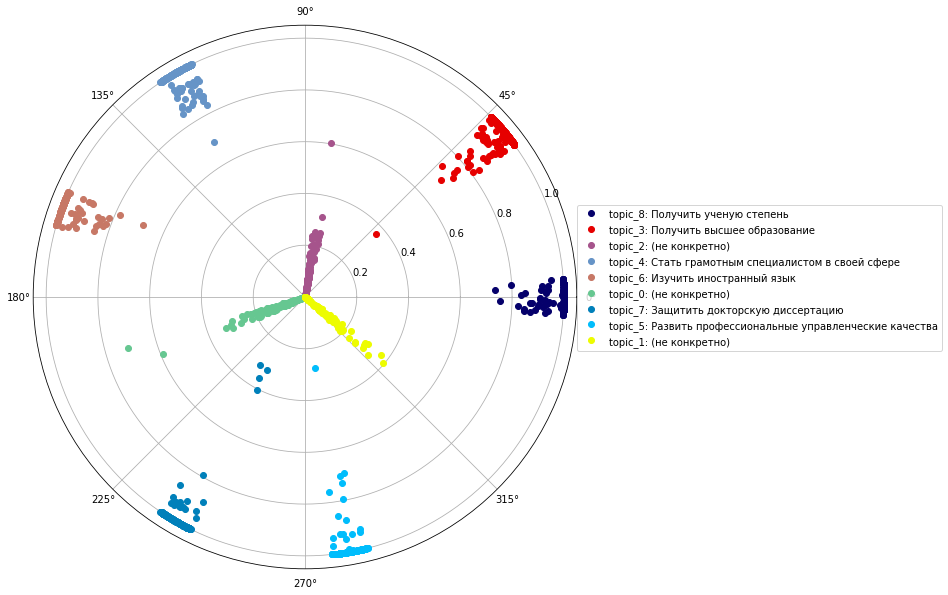

In [77]:
plt.figure(figsize=(10, 10))
for idx, color in zip(topic_spectrum, best_colors):
    topic = 'topic_' + str(idx)
    goals = specifisity.loc[specifisity['topic'] == topic]
    
    plt.polar(np.ones(goals.shape[0]) * topic_spectrum.index(idx) * np.pi / 4.5 + np.random.uniform(-0.07, 0.07, goals.shape[0]), 
              goals['specifisity'], 'ro', label=topic_description.loc[topic]['description'], color=color)
lgd = plt.legend(bbox_to_anchor=(1., 0.67), loc='upper left', borderaxespad=0.)
plt.savefig('images/specifisity_all_documents.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('images/specifisity_all_documents.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Специфичность слов

In [96]:
data = pd.read_csv('data_for_specifisity_calculations.csv')
data.index=data['id']

In [97]:
data['lemmatized_as_str'].fillna('', inplace=True)
data['bigram_as_str'].fillna('', inplace=True)
data['info_as_str'].fillna('', inplace=True)

In [98]:
data['lemmatized'] = [s.split() for s in data['lemmatized_as_str']]
data['bigram'] = [s.split() for s in data['bigram_as_str']]
data['info'] = [s.split() for s in data['info_as_str']]

In [99]:
data['ngram'] = [goal['lemmatized'] + goal['bigram'] + goal['info'] for index, goal in data.iterrows()]
data['ngram_as_str'] = [' '.join(l) for l in data['ngram']]

In [100]:
matrix_of_frequancies = frequency_matrix(data, phi)

In [101]:
bad_tokens = ['б', 'b', 'c', 'i', 'w', 'p', 'a', 'm', 'j', 'е', 'd']

In [108]:
tokens_all = train_total_dict_ngram
#bad_tokens = []
specifisity_words = pd.DataFrame(index=list(tokens_all), columns=['topic', 'specifisity'])
for token in tokens_all:
    s_w = specifisity_of_token(token, specific_topics, matrix_of_frequancies, theta, phi)
    if s_w == np.inf:
        bad_tokens.append(token)
        print(token)
    specifisity_words.loc[token]['specifisity'] = s_w
    specifisity_words.loc[token]['topic'] = phi.T[phi.T[token] == phi.T[token].max()].index.tolist()[0]

/home/polina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in double_scalars

/home/polina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in double_scalars



б
б
б
б
б
б
c
c
c
c
c
c
i
i
i
i
i
i
е
е
е
е
е
е
е
w
w
w
w
w
w
p
p
p
p
p
p
a
a
a
a
a
a
m
m
m
m
m
m
j
j
j
j
j
j
d
d
d
d
d
d
d


In [86]:
for token in bad_tokens:
    if token in tokens_all:
        tokens_all.remove(token)
    if token in tokens_d0:
        tokens_d0.remove(token)
    if token in tokens_d1:
        tokens_d1.remove(token)

NameError: name 'tokens_d0' is not defined

In [87]:
'd' in tokens_d0

NameError: name 'tokens_d0' is not defined

In [88]:
specifisity_words

,topic,specifisity
впоследствии,topic_1,5.10869e-05
понять_новое,topic_1,4.77639e-05
смена,topic_0,4.69792e-05
незнать,topic_1,4.69787e-05
подучить,topic_5,3.43248e-05
...,...,...
расширять,topic_1,4.69787e-05
являться,topic_5,4.35993e-05
мастер,topic_4,3.06883e-05
сфера_деятельность,topic_0,1.22736e-05


/home/polina/anaconda3/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning:

invalid value encountered in greater_equal

/home/polina/anaconda3/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning:

invalid value encountered in greater_equal



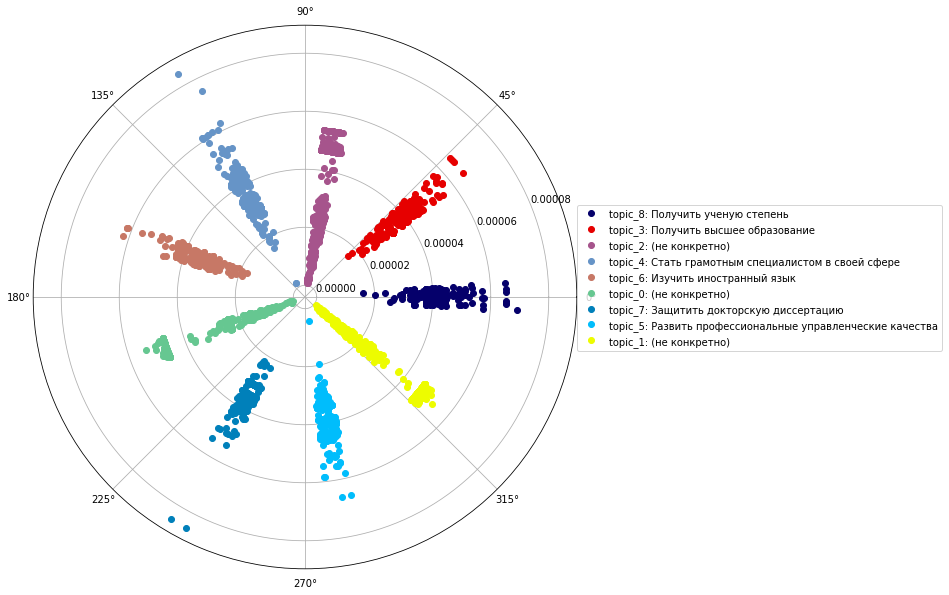

In [109]:
fig = plt.figure(figsize=(10, 10))
for idx, color in zip(topic_spectrum, best_colors):
    topic = 'topic_' + str(idx)
    tokens = specifisity_words.loc[specifisity_words['topic'] == topic]
    
    plt.polar(np.ones(tokens.shape[0]) * topic_spectrum.index(idx) * np.pi / 4.5 + np.random.uniform(-0.07, 0.07, tokens.shape[0]), 
              tokens['specifisity'], 'ro', label=topic_description.loc[topic]['description'], color=color)
lgd = plt.legend(bbox_to_anchor=(1., 0.67), loc='upper left', borderaxespad=0.)
plt.savefig('images/specifisity_all_words.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('images/specifisity_all_words.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [ ]:
filter_not_sp_words = [topic  in not_specific_topics for topic in specifisity_words['topic']]
filter_sp_words = [topic in specific_topics for topic in specifisity_words['topic']]

In [ ]:
tokens_not_sp_topic = list(specifisity_words.loc[filter_not_sp_words].index)
tokens_sp_topic = list(specifisity_words.loc[filter_sp_words].index)

In [ ]:
specifisity_not_sp_words = pd.DataFrame(index=list(tokens_not_sp_topic), columns=['topic', 'specifisity'])
for token in tokens_not_sp_topic:
    s_w = specifisity_of_token(token, specific_topics, matrix_of_frequancies, theta, phi)
    if s_w == np.inf:
        bad_tokens.append(token)
        print(token)
    specifisity_not_sp_words.loc[token]['specifisity'] = s_w
    specifisity_not_sp_words.loc[token]['topic'] = phi.T[phi.T[token] == phi.T[token].max()].index.tolist()[0]

In [ ]:
fig = plt.figure(figsize=(10, 10))
for idx, color in zip(topic_spectrum, best_colors):
    topic = 'topic_' + str(idx)
    tokens = specifisity_not_sp_words.loc[specifisity_not_sp_words['topic'] == topic]
    
    plt.polar(np.ones(tokens.shape[0]) * topic_spectrum.index(idx) * np.pi / 4.5 + np.random.uniform(-0.07, 0.07, tokens.shape[0]), 
              tokens['specifisity'], 'ro', label=topic_description.loc[topic]['description'], color=color)
lgd = plt.legend(bbox_to_anchor=(1., 0.67), loc='upper left', borderaxespad=0.)
plt.savefig('images/specifisity_d0_words.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('images/specifisity_d0_words.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [ ]:
specifisity_sp_words = pd.DataFrame(index=list(tokens_sp_topic), columns=['topic', 'specifisity'])
for token in tokens_sp_topic:
    s_w = specifisity_of_token(token, specific_topics, matrix_of_frequancies, theta, phi)
    if s_w == np.inf:
        bad_tokens.append(token)
        print(token)
    specifisity_sp_words.loc[token]['specifisity'] = s_w
    specifisity_sp_words.loc[token]['topic'] = phi.T[phi.T[token] == phi.T[token].max()].index.tolist()[0]

In [ ]:
fig = plt.figure(figsize=(10, 10))
for idx, color in zip(topic_spectrum, best_colors):
    topic = 'topic_' + str(idx)
    tokens = specifisity_sp_words.loc[specifisity_sp_words['topic'] == topic]
    
    plt.polar(np.ones(tokens.shape[0]) * topic_spectrum.index(idx) * np.pi / 4.5 + np.random.uniform(-0.07, 0.07, tokens.shape[0]), 
              tokens['specifisity'], 'ro', label=topic_description.loc[topic]['description'], color=color)
lgd = plt.legend(bbox_to_anchor=(1., 0.67), loc='upper left', borderaxespad=0.)
plt.savefig('images/specifisity_d1_words.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('images/specifisity_d1_words.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()